In [1]:
import pickle
import requests
import numpy as np
from os import path
import tensorflow as tf
from PIL import Image
from StringIO import StringIO
from string import lowercase, digits

In [2]:
charset = digits + lowercase
charset

'0123456789abcdefghijklmnopqrstuvwxyz'

In [3]:
def imageToVertor(image):
    """ 将图片转化为向量表示 """
    width = image.width
    height = image.height
    image = image.convert("L")
    image = np.asarray(image)
    image = image.reshape([width * height]) / 255
    return image

In [4]:
index = 1

In [5]:
session=tf.Session()    
modelPath = 'model/%s' % index
modelName = tf.train.latest_checkpoint(modelPath)
saver = tf.train.import_meta_graph(modelName + '.meta')
saver.restore(session, modelName)
nodes = pickle.load(open(path.join(modelPath, 'nodes.pk'), "rU" ))

INFO:tensorflow:Restoring parameters from model/1/model-2999


In [6]:
graph = tf.get_default_graph()
x = graph.get_tensor_by_name(nodes['x'])
prediction = graph.get_tensor_by_name(nodes['prediction'])
keep_prob = graph.get_tensor_by_name(nodes['keep_prob'])

In [7]:
# x = session.graph.get_tensor_by_name(nodes['x'])
# prediction = session.graph.get_tensor_by_name(nodes['prediction'])
# keep_prob = session.graph.get_tensor_by_name(nodes['keep_prob'])

In [8]:
url = 'https://s.nacao.org.cn/servlet/ValidateCode?time='
response = requests.get(url)
image = Image.open(StringIO(response.content))

prediction: ['5']


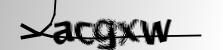

In [12]:
imageList = [image]
x_data = map(imageToVertor, imageList)
p = session.run(prediction, feed_dict={x: x_data, keep_prob: .75})
print 'prediction:', map(lambda x: charset[x], p[0])
image

In [10]:
!ls model

0  1  2  3  4
